In [2]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

Plane Widget
============

The plane widget can be enabled and disabled by the
`pyvista.WidgetHelper.add_plane_widget`{.interpreted-text role="func"}
and `pyvista.WidgetHelper.clear_plane_widgets`{.interpreted-text
role="func"} methods respectively. As with all widgets, you must provide
a custom callback method to utilize that plane. Considering that planes
are most commonly used for clipping and slicing meshes, we have included
two helper methods for doing those tasks!

Let\'s use a plane to clip a mesh:


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


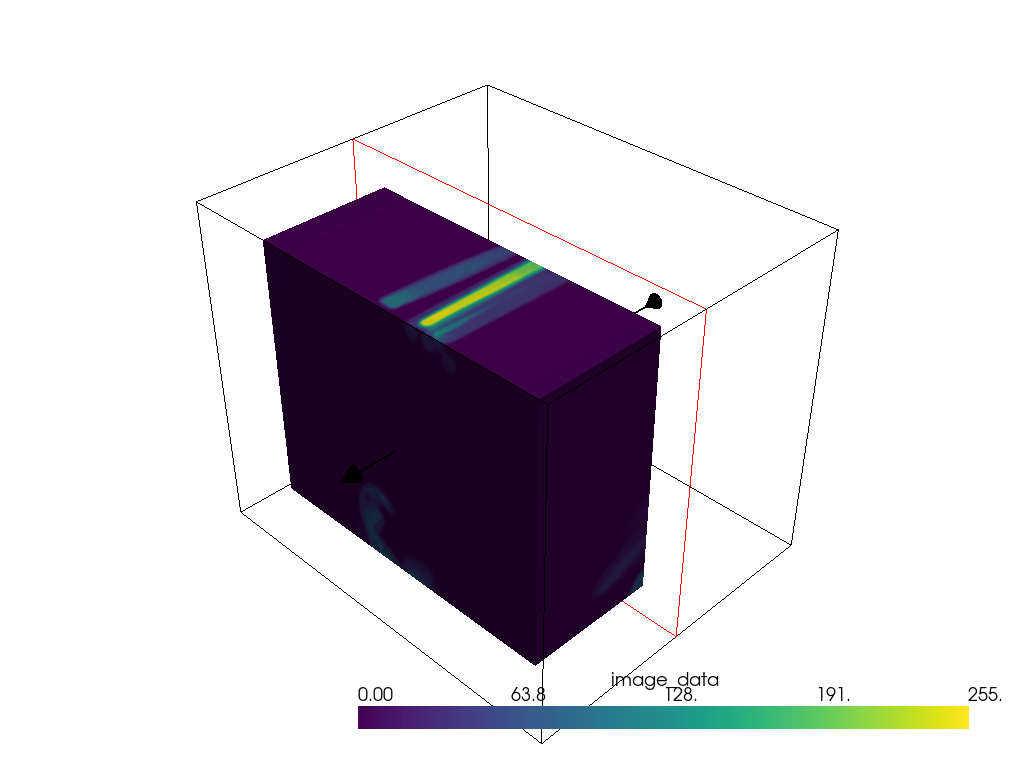

In [3]:
# sphinx_gallery_thumbnail_number = 2
import pyvista as pv
from pyvista import examples

vol = examples.download_brain()

p = pv.Plotter()
p.add_mesh_clip_plane(vol)
p.show()

After interacting with the scene, the clipped mesh is available as:


In [4]:
p.plane_clipped_meshes

[UnstructuredGrid (0x7fdcc97a3520)
   N Cells:	3538080
   N Points:	3613484
   X Bounds:	9.000e+01, 1.800e+02
   Y Bounds:	0.000e+00, 2.160e+02
   Z Bounds:	0.000e+00, 1.800e+02
   N Arrays:	1]

And here is a screen capture of a user interacting with this

![image](../../images/gifs/plane-clip.gif)


Or you could slice a mesh using the plane widget:


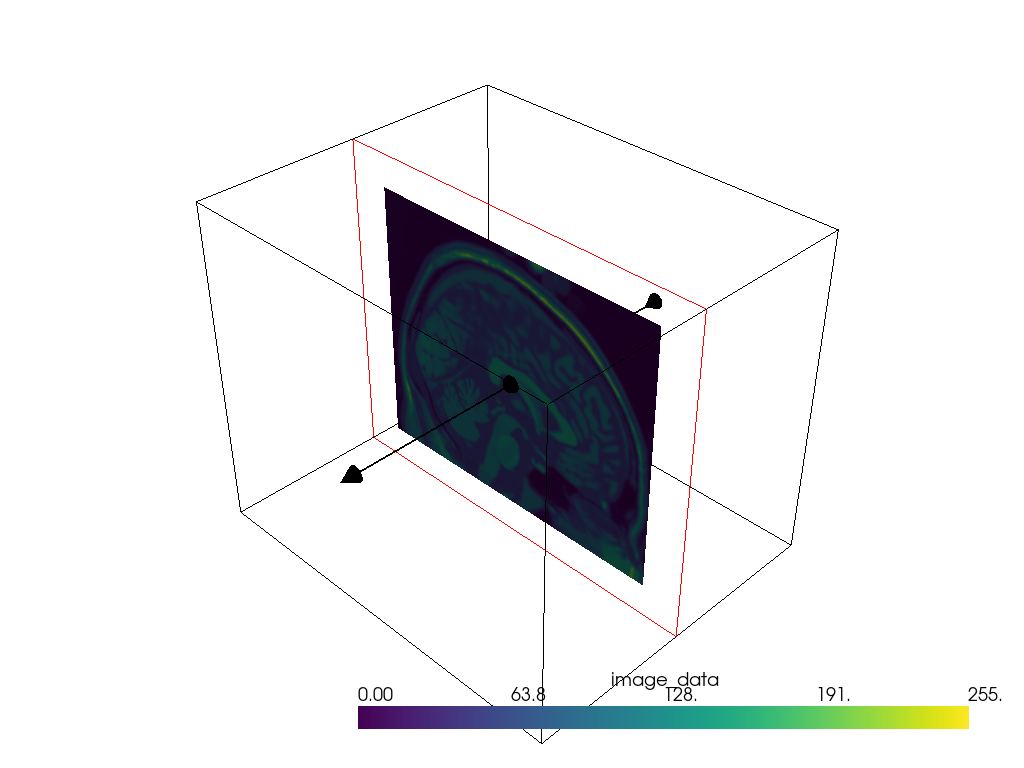

In [5]:
p = pv.Plotter()
p.add_mesh_slice(vol)
p.show()

After interacting with the scene, the slice is available as:


In [6]:
p.plane_sliced_meshes

[PolyData (0x7fdca2543bb0)
   N Cells:	38880
   N Points:	39277
   X Bounds:	9.000e+01, 9.000e+01
   Y Bounds:	0.000e+00, 2.160e+02
   Z Bounds:	0.000e+00, 1.800e+02
   N Arrays:	1]

And here is a screen capture of a user interacting with this

![image](../../images/gifs/plane-slice.gif)


Or you could leverage the plane widget for some custom task like
glyphing a vector field along that plane. Note that we have to pass a
`name` when calling `add_mesh` to ensure that there is only one set of
glyphs plotted at a time.


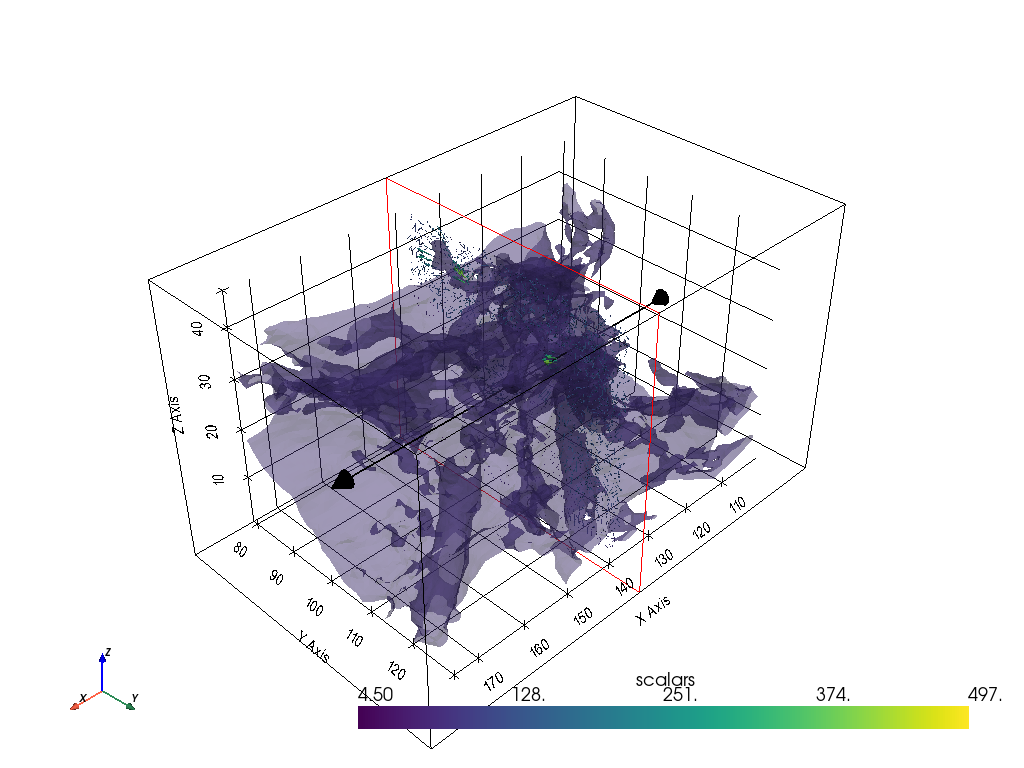

In [7]:
import pyvista as pv
from pyvista import examples

mesh = examples.download_carotid()

p = pv.Plotter()
p.add_mesh(mesh.contour(8).extract_largest(), opacity=0.5)

def my_plane_func(normal, origin):
    slc = mesh.slice(normal=normal, origin=origin)
    arrows = slc.glyph(orient='vectors', scale="scalars", factor=0.01)
    p.add_mesh(arrows, name='arrows')

p.add_plane_widget(my_plane_func)
p.show_grid()
p.add_axes()
p.show()

And here is a screen capture of a user interacting with this

![image](../../images/gifs/plane-glyph.gif)


Further, a user can disable the arrow vector by setting the
`normal_rotation` argument to `False`. For example, here we
programmatically set the normal vector on which we want to translate the
plane and we disable the arrow to prevent its rotation.


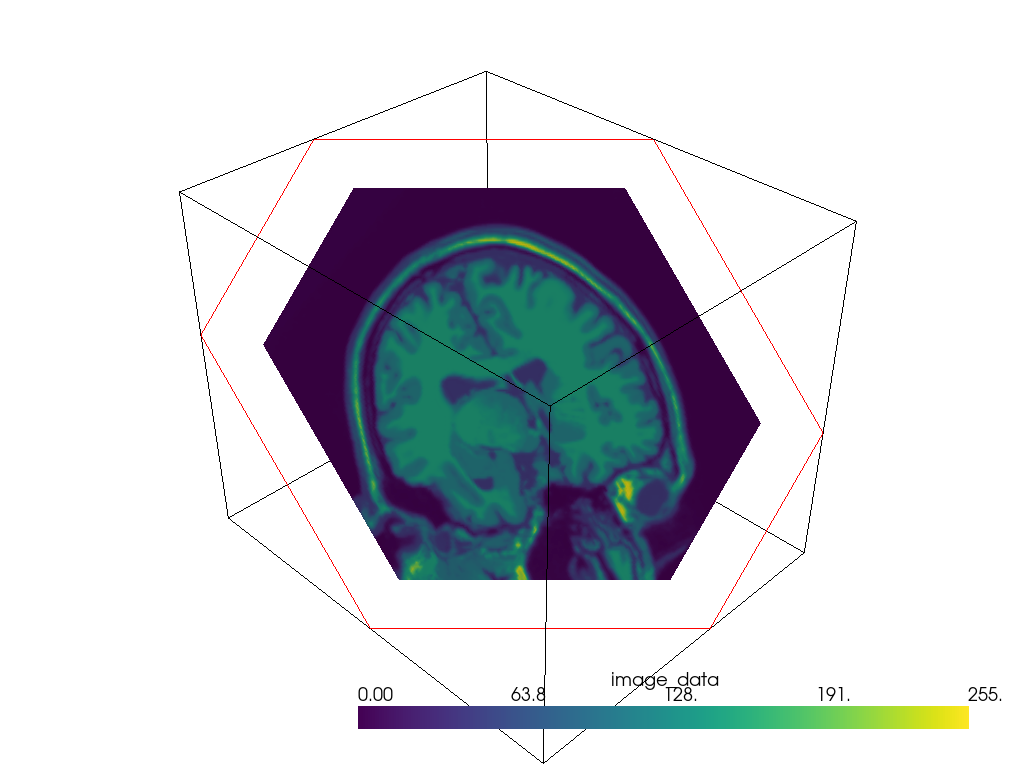

In [8]:
p = pv.Plotter()
p.add_mesh_slice(vol, normal=(1,1,1), normal_rotation=False)
p.show()

The vector is also forcibly disabled anytime the `assign_to_axis`
argument is set.


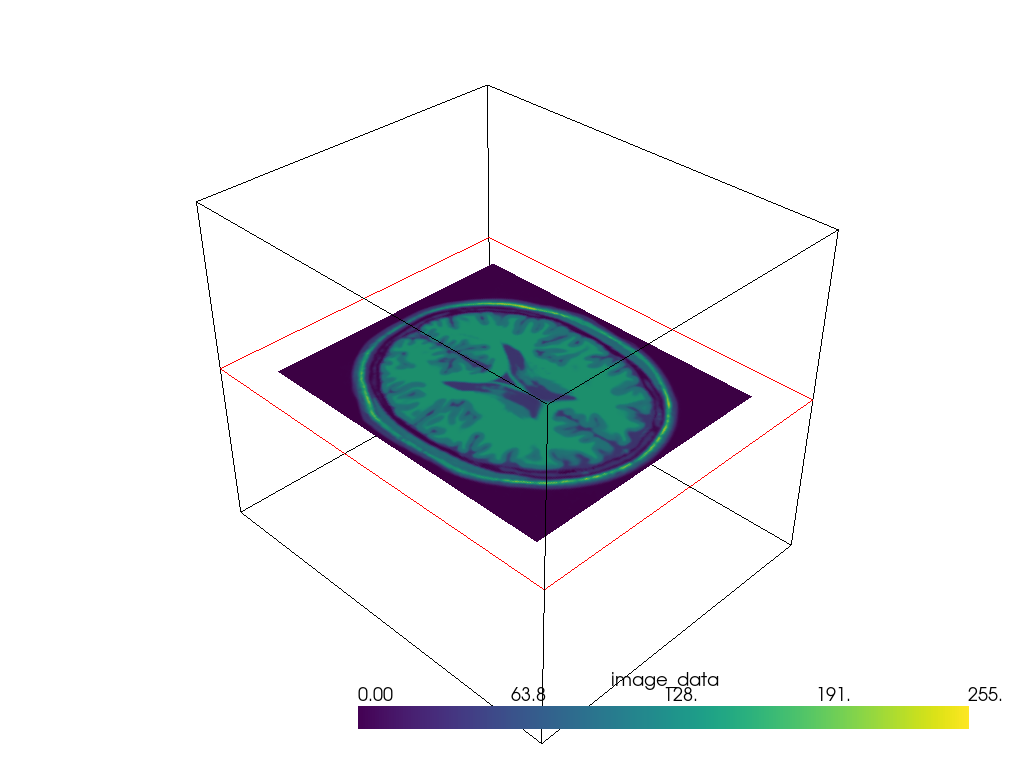

In [9]:
p = pv.Plotter()
p.add_mesh_slice(vol, assign_to_axis='z')
p.show()